# Lecture 4: What are filters?
Audio Processing, MED4, Aalborg University, 2021

By Jesper Kjær Nielsen (jkn@create.aau.dk) and Cumhur Erkut (cer@create.aau.dk)

Last edited: 2021-02-27

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Central aspects of the course
- [x] What is sound?
- [x] How is sound generated?
- [x] How is sound turned into signals (i.e., data) on a computer?
- [ ] **How can we analyse these signals (i.e. extract information from them)?**
- [ ] How can we modify these signals?
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/apOverview.png?raw=1" alt="Course overview" width="100%"/>
</center>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-4:-What-are-filters?" data-toc-modified-id="Lecture-4:-What-are-filters?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lecture 4: What are filters?</a></span><ul class="toc-item"><li><span><a href="#Introduction-to-filtering" data-toc-modified-id="Introduction-to-filtering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction to filtering</a></span></li><li><span><a href="#Feedforward-filters-and-their-impulse-responses" data-toc-modified-id="Feedforward-filters-and-their-impulse-responses-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feedforward filters and their impulse responses</a></span></li><li><span><a href="#Frequency-response-of-feedforward-filters" data-toc-modified-id="Frequency-response-of-feedforward-filters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Frequency response of feedforward filters</a></span></li><li><span><a href="#Introduction-to-the-feedback-filter" data-toc-modified-id="Introduction-to-the-feedback-filter-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Introduction to the feedback filter</a></span></li></ul></li></ul></div>

## Introduction to filtering
In the next 20 minutes, you will learn
- that you are already using filters in your everyday life
- how you can understand filtering in connection with audio

### Some filters from our everyday life:

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/coffeeFilter.jpg?raw=1" alt="Coffee filter" width="80%"/>
</center>

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/fishNet.jpg?raw=1" alt="Fish net" width="80%"/>
</center>

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/instagramFilter.jpg?raw=1" alt="Instagram filter" width="80%"/>
</center>

#### What about filters for audio?

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/bassTreble.jpg?raw=1" alt="Pre-amp" width="80%"/>
</center>

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ancHeadphones.jpg?raw=1" alt="ANC Headphones" width="80%"/>
</center>

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/microphoneArray.jpg?raw=1" alt="Microphone array" width="80%"/>
</center>

<center>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=R87mpsSAHXg&t=84s
" target="_blank"><img src="http://img.youtube.com/vi/R87mpsSAHXg/0.jpg" 
alt="Wah Wah pedal" width="480" height="360" border="10" /></a>
</center>

#### Example: measuring speed using filtering
<br />

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/carSpeedometer.jpg?raw=1" alt="Speedometer of a car" width="80%"/>
</center>

- Assume that we wish to show the **instantaneous speed** of a car to its driver:
- Unfortunately, we cannot measure the speed directly, but only the driven distance $s(t)$ every $T_\text{s}$ seconds.
- After sampling, the discrete-time signal describing the the driven distance is $s_n=s(t_n)$.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4VehicleSpeedPosition.png?raw=1" alt="Position of a vehicle" width="60%"/>
</center>

To compute the **instantaneous speed** $v_n$ from $s_n$, we use that the speed of an object is **how much the object moves per unit time**. Thus, we could compute the **instantaneous speed** as
$$
    v_n = \frac{s_n-s_{n-1}}{T_\text{s}} = f_\text{s}(s_n-s_{n-1}) = f_\text{s}s_n-f_\text{s}s_{n-1}\ .
$$


<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4VehicleSpeed.png?raw=1" alt="Speed of a vehicle" width="60%"/>
</center>

The computation of the instantaneous speed can be interpreted as a **filter** given by
$$
    v_n = f_\text{s}s_n-f_\text{s}s_{n-1}
$$
and this is a so-called **difference equation**.
- Filter input: the discrete-time signal $s_n$ (position)
- Filter output: the discrete-time signal $v_n$ (speed)
- Filtering operation: a function which maps the input signal into the output signal

If we loook at the difference equation
$$
    v_n = f_\text{s}s_n-f_\text{s}s_{n-1}\ ,
$$
we have to do three things to do filtering:
1. **multiply** numbers (e.g., $ax_n$)
2. **sum** numbers (e.g., $x_n+s_n$)
3. **delay** samples (e.g., $x_{n-m}$)

We can also illustrate these three operations graphically.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4FilterBuildingBlocks.png?raw=1" alt="Filter blocks" width="60%"/>
</center>

The filter
$$
    v_n = f_\text{s}s_n-f_\text{s}s_{n-1}\ ,
$$
can then be illustrated as

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4VehicleSpeedFilter.png?raw=1" alt="Filter interpretation of speed of a vehicle" width="60%"/>
</center>

### A digital filter
We have the following components in a digital filter:
- **Filter input**: a discrete-time signal $x_n$
- **Filter output**: a discrete-time signal $y_n$
- **Filter operation**: a function $f(y_{n-1}, y_{n-2}, \ldots, y_{n-p}, x_n, x_{n-1}, x_{n-2}, \ldots, x_{n-q})$ which computes the current output sample $y_n$ from
 - the current input sample $x_n$ and $q$ past input samples $x_{n-1}, x_{n-2}, \ldots, x_{n-q}$ and
 - the past $p$ output samples $y_{n-1}, y_{n-2}, \ldots, y_{n-p}$
 
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/xn_Filter_yn.png?raw=1" alt="Filter block" width="60%"/>
</center>

---
Note that the filter output can, in principle, also depend on future values of the input. However, we will not cover this here.

Two main types of filters:
- **Feedforward filter**: the filter output only depends on the filter inputs, i.e.,
$$
    y_n = f(x_n, x_{n-1}, x_{n-2}, \ldots, x_{n-q})
$$
 - The number of past output samples $q$ is zero
 - The feedforward filter is also often referred to a finite impulse response (FIR) filter. More on why later.

- **Feedback filter**: the filter can depend on both the input and output signals, i.e.,
$$
    y_n = f(y_{n-1}, y_{n-2}, \ldots, y_{n-p}, x_n, x_{n-1}, x_{n-2}, \ldots, x_{n-q})
$$
 - The number of past output samples $p$ is at least 1
 - The feedback filter is also often referred to an infinite impulse response (IIR) filter. More on why later.

#### Example: measuring speed using filtering
We can say the following about the filter
$$
    v_n = f_\text{s}s_n-f_\text{s}s_{n-1}.
$$

- The filter input is the signal $s_n$
- The filter output is the signal $v_n$
- The filter is a feedforward filter since the output only depends on the input signal. Thus, $p=0$.
- The order $q$ is one, i.e., the filter is a first-order FIR filter

### Summary
1. Filtering can be based on
 - object size: e.g., coffee and fish
 - wavelength/**frequency**: e.g., light and **audio**
 - space: e.g., microphone array
2. Generally, you can think of a filter as something which extracts what you are interested in.

3. We usually draw a filter as in the figure below where
 - **Filter input**: a discrete-time signal $x_n$
 - **Filter output**: a discrete-time signal $y_n$
 - **Filter operation**: computes the current output sample as a combination of the **current and past input samples** and the **past output samples** (we have not seen the latter yet, though)
  
<center>
    <img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/xn_Filter_yn.png?raw=1" alt="Filter block" width="60%"/>
</center>

### Active break
1. Discuss with your neighbour what the three blocks illustrated below do. What eactly means $x_n$ (discussed in the last lecture) and does it relate to sampling?

Assume that we have a filter given by
$$
    y_n = x_n + b_1 x_{n-1}\ .
$$
2. Illustrate this filter graphically. 
3. Let us assume that $x_n = 1$ for $n=0$ and zero otherwise. Compute $y_n$ by hand for $n = 0,1,\ldots,4$.

Now assume that we have the slightly more complicated filter
$$
    y_n = b_0 x_n+b_1 x_{n-1}+b_2x_{n-2}\ .
$$
4. Repeat 2. and 3. from above with this new filter.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4FilterBuildingBlocks.png?raw=1" alt="Filter blocks" width="50%"/>
</center>

## Feedforward filters and their impulse responses
In the next 20 minutes, you will learn
- what a feedforward filter is
- what the impulse response of a filter is

### Difference equation
The difference equation of a feedforward filter is
\begin{align}
    y_n &= b_0x_n + b_1 x_{n-1} + \cdots + b_q x_{n-q}\\
    &= \sum_{m=0}^{q} b_m x_{n-m}
\end{align}
where
- $x_n$ is the input signal
- $y_n$ is the output signal
- $b_0, b_1, \ldots, b_q$ are **filter coefficients**
- we can refer to the past values $x_{n-1}, x_{n-2}, \ldots, x_{n-q}$ as the **filter state**.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/feedforwardFilterIllustration.png?raw=1" alt="Feedforward Filter Illustration" width="50%"/>
</center>

### Impulse response of a feedforward filter
#### Example: a simple filter
Let us look at the filter
$$
    y_n = x_n+b_1 x_{n-1}\ .
$$
Thus, we have
- $q=1$
- $b_0=1$
- the filter state is $x_{n-1}$

Let us try to send an impulse
$$
    \delta_n = \begin{cases}
        1 & n=0\\
        0 & \text{otherwise}
    \end{cases}
$$
through the filter.

When we set $x_n=\delta_n$, we get
$$
    y_n = \begin{cases}
        1 & n=0\\
        b_1 & n=1\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

The filter's response to an impulse is referred to as the filter's **impulse response** and usually denoted by $h_n$, i.e., $y_n=h_n$ when $x_n=\delta_n$.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4FirImpulseResponse.png?raw=1" alt="Sketch of FIR impulse response" width="70%"/>
</center>

#### Example: a slightly more complicated filter
Let us look at the filter
$$
    y_n = b_0 x_n+b_1 x_{n-1}+b_3 x_{n-3}\ .
$$
Thus, we have
- $q=3$
- $b_2=0$
- the filter state is $x_{n-1}, x_{n-2}, x_{n-3}$

Let us try to send an impulse
$$
    \delta_n = \begin{cases}
        1 & n=0\\
        0 & \text{otherwise}
    \end{cases}
$$
through the filter.

When we set $x_n=\delta_n$, we obtain the impulse response $h_n=y_n$ to
$$
    h_n = \begin{cases}
        b_0 & n=0\\
        b_1 & n=1\\
        b_3 & n=3\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

#### Impulse response of a general feedforward filter
If an impulse $\delta_n$ is send through a feedforward filter of the form
\begin{align}
    y_n &= b_0x_n + b_1 x_{n-1} + \cdots + b_p x_{n-q}\\
    &= \sum_{m=0}^{q} b_m x_{n-m}\ ,
\end{align}
we obtain the impulse response $h_n = y_n$ as
$$
    h_n = \begin{cases}
        b_n & 0\leq n \leq q\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

Since the filter output goes to and stays at 0 for sampling indices $n>q$, the feedforward filter is usually referred to as the **finite impulse response (FIR)** filter.

In [4]:
def firFiltering(filterCoefficients, inputSignal, filterState=None):
    nData = np.size(inputSignal)
    firFilterOrder = np.size(filterCoefficients)-1
    # set the filter state to zeros if not specified
    if filterState is None:
        filterState = np.zeros(firFilterOrder)
    # do the filtering
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        outputSignal[n] = filterCoefficients[0]*inputSignal[n]
        for m in np.arange(firFilterOrder):
            outputSignal[n] = outputSignal[n] + \
                filterCoefficients[m+1]*filterState[m] 
        filterState = np.r_[inputSignal[n],filterState[0:firFilterOrder-1]]
    return outputSignal, filterState

In [5]:
# compute the impulse response
nData = 10
impulse = np.r_[1, np.zeros(nData-1)]
samplingIndices = np.arange(nData)
filterCoefficients = np.array([1.1, -0.5, 0, 0.5, 0.25])
impulseResponse, filterState = firFiltering(filterCoefficients, impulse)

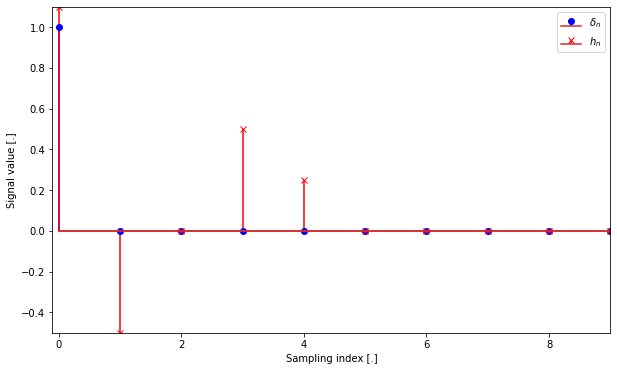

In [6]:
# plot the results
plt.figure(figsize=(10,6))
plt.stem(samplingIndices, impulse,'b', markerfmt='bo', label="$\delta_n$", use_line_collection=True)
plt.stem(samplingIndices, impulseResponse, 'r', markerfmt='rx', label="$h_n$", use_line_collection=True)
plt.legend()
plt.xlim((samplingIndices[0]-0.1,samplingIndices[nData-1])), plt.ylim((-0.5,1.1))
plt.xlabel('Sampling index [.]'), plt.ylabel('Signal value [.]');

### Summary
1. A feedforward filter has the **difference equation**
\begin{align}
    y_n &= b_0x_n + b_1 x_{n-1} + \cdots + b_p x_{n-q}= \sum_{m=0}^{q} b_m x_{n-m}\ .
\end{align}
2. If we send an impulse $\delta_n$ through a filter, we obtain the filter's **impulse response**.
3. For a general feedforward filter, the impulse response is **finite** and given by
$$
    h_n = \begin{cases}
        b_n & 0\leq n \leq q\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

### Active break
1. Describe in words what an impulse response is and how you can compute it.
2. Sketch the impulse response of the following feedforward filter
$$
    y_n = \frac{1}{q+1}\sum_{m=0}^q x_{n-m}\ .
$$
What are the filter coefficients $b_0, b_1, \ldots, b_q$?
3. Simulate samples for $n=0,1,\ldots,47999$ from the following input signal
$$
    x_n = \cos(2\pi f_1 n/f_\text{s}) + \cos(2\pi f_2 n/f_\text{s})
$$
where $f_\text{s} = 48$ kHz, $f_1 = 500$ Hz, and $f_1 = 5$ kHz. (Tip: use the function `genSinusoid` from the last block of lecture 2). Plot the first 200 samples of the signal $x_n$.
4. Compute $y_n$ by filtering $x_n$ through the filter above (Tip: you can use [scipy's `lfilter` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) instead of mine from above.
5. Plot the first 200 samples of $x_n$ and $y_n$ in the same plot. What does the filter seem to do? Can you also hear this if you play back the signals?

## Frequency response of feedforward filters
In the next 20 minutes, you will learn
- what the frequency response of a filter is
- what the frequency response of a feedforward filter is
- what the amplitude and phase response of a filter is

#### Example: a first order FIR filter
Let us again look at the simple filter
$$
    y_n = x_n+b_1 x_{n-1}
$$
which we also looked at before and now know is a **first order FIR filter** with impulse response
$$
    h_n = \begin{cases}
        1 & n=0\\
        b_1 & n=1\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

Instead of an impulse, let us now try to send the phasor $\mathrm{e}^{j\omega n}$ through the filter. 

We set $x_n=\mathrm{e}^{j\omega n}$ and get
\begin{align}
    y_n &= \mathrm{e}^{j\omega n} + b_1\mathrm{e}^{j\omega (n-1)} = \mathrm{e}^{j\omega n} + b_1\mathrm{e}^{-j\omega }\mathrm{e}^{j\omega n}\\
    &= \left[1+b_1\mathrm{e}^{-j\omega }\right] \mathrm{e}^{j\omega n}\ .
\end{align}
Note that
- we used the rule $a^n a^m = a^{n+m}$
- the filter output is simply the real value, i.e., $\text{Re}(y_n)$, if we set $x_n=\text{Re}(\mathrm{e}^{j\omega n})=\cos(\omega n)$.

Thus, the output signal is simply the phasor (input signal $x_n$) multiplied by the complex number
$$
    H(\omega) = 1+b_1\mathrm{e}^{-j\omega }
$$
which depends on the digital frequency $\omega$ and filter coefficients $1$ and $b_1$, but not on the sampling index $n$.

When viewed as a function of the digital frequency $\omega$, we call this complex number for the filter's **frequency response**.

Using Euler's formula
$$
    \mathrm{e}^{j\theta} = \cos(\theta)+j\sin(\theta)\ ,
$$
we can write the frequency response $H(\omega)$ in a rectangular form as
$$
    H(\omega) = 1+b_1\cos(\omega)-jb_1\sin(\omega)
$$
which has $1+b_1\cos(\omega)$ as the real part and $-b_1\sin(\omega)$ as the imaginary part.

More interestingly, the polar form of the frequency response can be written as
$$
    H(\omega) = |H(\omega)|\mathrm{e}^{j\angle H(\omega)}
$$
where
\begin{align}
    |H(\omega)| &= \sqrt{(1+b_1\cos(\omega))^2+(-b_1\sin(\omega))^2} = \sqrt{1+b_1^2+2b_1\cos(\omega)}\\
    \angle H(\omega) &= \mathrm{arctan}\left(\frac{-b_1\sin(\omega)}{1+b_1\cos(\omega)}\right)\ .
\end{align}
Note that $|H(\omega)|$ and $\angle H(\omega)$ are usually referred to as the **amplitude response** and **phase response**, respectively.

In [7]:
def firFreqResp(filterCoefficients, freqGrid):
    nFreqs = np.size(freqGrid)
    firFilterOrder = np.size(filterCoefficients)-1
    # compute the frequency response
    freqResp = filterCoefficients[0]*np.ones(nFreqs)
    for m in np.arange(firFilterOrder)+1:
        freqResp = freqResp + filterCoefficients[m]*np.exp(-1j*m*freqGrid)
    return freqResp

In [8]:
# compute the frequency response
nFreqs = 100
freqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
firFilterCoefficients = np.array([1, 0.9])
_, freqResp = sig.dfreqresp((firFilterCoefficients, 1, 1), freqGrid)
ampResp = np.abs(freqResp)
phaseResp = np.angle(freqResp)

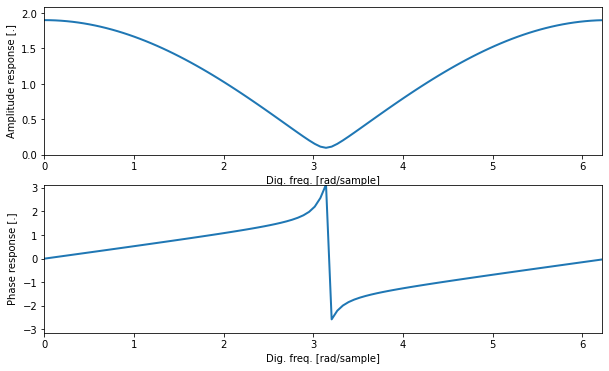

In [9]:
# plot the results
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(freqGrid, ampResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((0,1.1*np.max(ampResp)))
plt.xlabel('Dig. freq. [rad/sample]'), plt.ylabel('Amplitude response [.]');
plt.subplot(2,1,2)
plt.plot(freqGrid, phaseResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((-np.pi,np.pi))
plt.xlabel('Dig. freq. [rad/sample]'), plt.ylabel('Phase response [.]');

#### Example: filtering two phasors
Assume that we have the signal
$$
    x_n = \mathrm{e}^{j\omega_1 n} + \mathrm{e}^{j\omega_2 n}
$$
where $\omega_1=2\pi f_1/f_\text{s}$ and $\omega_2=2\pi f_2/f_\text{s}$ are **digital frequencies** (see last lecture).

The filter output is then
\begin{align}
    y_n &= x_n+b_1 x_{n-1} = H(\omega_1)\mathrm{e}^{j\omega_1 n}+H(\omega_2)\mathrm{e}^{j\omega_2 n}\\
    &= A_1 \mathrm{e}^{j\omega_1 n+\Phi_1}+ A_2 \mathrm{e}^{j\omega_2 n+\Phi_2}
\end{align}
where the amplitudes and phases of the sinusoids for $i=\{1,2\}$ are given by
\begin{align}
    A_i &= |H(\omega_i)| = \sqrt{1+b_1^2+2b_1\cos(\omega_i)}\\
    \Phi_i &= \angle H(\omega_i) = \mathrm{arctan}\left(\frac{-b_1\sin(\omega_i)}{1+b_1\cos(\omega_i)}\right)\ .
\end{align}

Thus, the filter changes the **amplitudes** and **phases** of the sinusoids, but not the **frequencies**!

### Frequency response of a general feedforward filter
If we send a phasor $\mathrm{e}^{j\omega n}$ through the feedforward filter
\begin{align}
    y_n &= b_0x_n + b_1 x_{n-1} + \cdots + b_q x_{n-q} = \sum_{m=0}^{q} b_m x_{n-m}\ ,
\end{align}
we obtain
$$
    y_n = \sum_{m=0}^{q} b_m \mathrm{e}^{j\omega (n-m)} = \mathrm{e}^{j\omega n} \sum_{m=0}^{q} b_m \mathrm{e}^{-j\omega m}\ .
$$

Thus, the **frequency response** of the feedforward filter is
$$
    H(\omega) = b_0 + b_1\mathrm{e}^{-j\omega} + \cdots + b_q \mathrm{e}^{-j\omega q} = \sum_{m=0}^{q} b_m \mathrm{e}^{-j\omega m}\ .
$$

### The transfer function
When we derived the frequency response, we used a phasor as the input signal, i.e., $x_n=\mathrm{e}^{j\omega n}$. If we set $x_n=z^n$ as the input signal, where $z$ in an arbitrary complex number, we get
$$
    y_n = \sum_{m=0}^{q} b_m z^{n-m} = z^n \sum_{m=0}^{q} b_m z^{-m}\ .
$$
Analogously to the frequency response, we see that the output signal is a multiplication between the input signal and a complex number $H(z)$ given by
$$
    H(z) = b_0 + b_1z^{-1} + \cdots + b_q z^{-q} = \sum_{m=0}^{q} b_m z^{-m}\ .
$$
This complex number is referred to as the filter's **transfer function**.

If we write the complex number $z$ in its polar form $z=r\mathrm{e}^{j\omega}$, we see that
$$
    z^n = (r\mathrm{e}^{j\omega})^n = r^n\mathrm{e}^{j\omega n}\ .
$$
Thus, the frequency response is a special case of the transfer function for $r=1$!

We often prefer working with the transfer function for a couple of reasons:
1. Simpler notation since we can write $z$ instead of $\mathrm{e}^{j\omega}$.
2. The frequency response is a special case of the transfer function (when we set $r=1$ in the latter).
3. The transfer function allow us to make a more thorough analysis of the filter.

We will say much more on the transfer function in lecture 6.

### Summary
1. If we send a phasor $\mathrm{e}^{j\omega n}$ through a filter, we obtain the filter's **frequency response** at the frequency $\omega$.
2. For a general feedforward filter, the frequency response is
$$
    H(\omega) = \sum_{m=0}^{q} b_m \mathrm{e}^{-j\omega m}
$$
which is just a complex number whose
 - magnitude $|H(\omega)|$ is known as the **amplitude response**
 - phase $\angle H(\omega)$ is known as the **phase response**.


### Active break
Consider the simple filter with difference equation
$$
    y_n = 0.5x_n+0.5x_{n-1}\ .
$$
1. What can you say about this filter (type, filter coefficients,  and order $q$)? Make a drawing of the filter.
2. Compute the filter's impulse response $h_n$.
3. Compute the filter's frequency response $H(\omega)$, amplitude response $|H(\omega)|$, and phase response $\angle H(\omega)$. Feel free to use either a computer or pen and paper.
4. Do exercise 1 in the *Introduction to Audio Processing* book (p. 60). You can use Python instead of Pure Data.

---
Tip: Send an impulse $\delta_n$ and a phasor $\mathrm{e}^{j\omega n}$ through the filter to get the impulse response and the frequency response, respectively.  Moreover, a feedforward filter has the difference equation
\begin{align}
    y_n &= b_0x_n + b_1 x_{n-1} + \cdots + b_q x_{n-q} = \sum_{m=0}^{q} b_m x_{n-m}\ .
\end{align}


## Introduction to the feedback filter
In the next 20 minutes, you will learn
- what a feedback filter is
- what the impulse response and frequency response of a feedback filter is
- what a resonance filter is

### Feedback filter
The difference equation of a feedback filter (with $q=1$) is
\begin{align}
    y_n &= b_0x_n + a_1y_{n-1} + \ldots + a_py_{n-p} = b_0x_n + \sum_{m=0}^{p} a_m y_{n-m}
\end{align}
where
- $x_n$ is the input signal
- $y_n$ is the output signal
- $b_0, a_1, a_2, \ldots, a_p$ are **filter coefficients**
- we often refer to the past values $y_{n-1}, y_{n-2}, \ldots, y_{n-p}$ as the **filter state**.

---
Note that general feedback filters can have $q>1$, but we wait with this general case until lecture 6.

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4IirFilterIllustration.png?raw=1" alt="Feedback Filter Illustration" width="50%"/>
</center>

### Impulse response of a feedback filter
#### Example: a simple filter
Let us look at the filter
$$
    y_n = x_n+a_1 y_{n-1}\ .
$$
Thus, we have
- $p=0$ and $q=1$
- $b_0=1$
- the filter state is $y_{n-1}$

Let us try to send an impulse
$$
    \delta_n = \begin{cases}
        1 & n=0\\
        0 & \text{otherwise}
    \end{cases}
$$
through the filter.

When we set $x_n=\delta_n$, we get the impulse response $h_n=y_n$ given by
$$
    h_n = \begin{cases}
        a_1^n & n\geq 0\\
        0 & \text{otherwise}
    \end{cases}\ .
$$
Note that $h_n$ never becones zero for $n\geq 0$. Therefore, feedback filters are referred to as **infinite impulse response** (IIR) filters.
- Unlike an FIR filter, the impulse response of a general IIR filter is not simply linked to the filter coefficients.

In [10]:
def iirFiltering(filterCoefficients, inputSignal, filterState=None):
    # NOTE: this is only a special case of an IIR filter where the there is no feedforward part,
    # except for x_n which is unscaled (i.e., p=0 and b_0=1).
    nData = np.size(inputSignal)
    iirFilterOrder = np.size(filterCoefficients)
    # set the filter state to zeros if not specified
    if filterState is None:
        filterState = np.zeros(iirFilterOrder)
    # do the filtering
    outputSignal = np.zeros(nData)
    for n in np.arange(nData):
        outputSignal[n] = inputSignal[n]
        for m in np.arange(iirFilterOrder):
            outputSignal[n] = outputSignal[n] + \
                filterCoefficients[m]*filterState[m]
        filterState = np.r_[outputSignal[n],filterState[0:iirFilterOrder-1]]
    return outputSignal, filterState

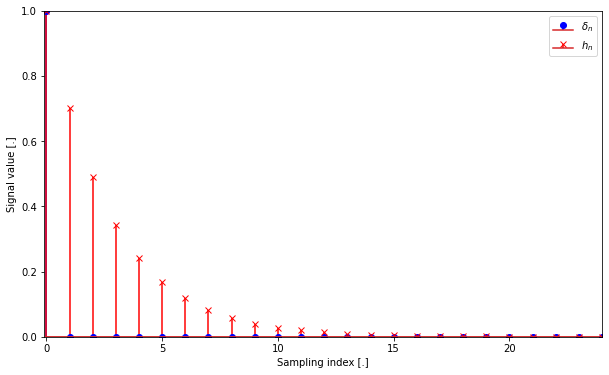

In [13]:
# compute the impulse response
nData = 25
impulse = np.r_[1, np.zeros(nData-1)]
samplingIndices = np.arange(nData)
filterCoefficients = np.array([0.7])
impulseResponse, filterState = iirFiltering(filterCoefficients, impulse)
# plot the results
plt.figure(figsize=(10,6))
plt.stem(samplingIndices, impulse,'b', markerfmt='bo', label="$\delta_n$", use_line_collection=1)
plt.stem(samplingIndices, impulseResponse, 'r', markerfmt='rx', label="$h_n$", use_line_collection=1)
plt.legend()
plt.xlim((samplingIndices[0]-0.1,samplingIndices[nData-1])),
plt.ylim((np.minimum(np.min(impulseResponse),0),np.max(impulseResponse)))
plt.xlabel('Sampling index [.]'), plt.ylabel('Signal value [.]');

### Frequency response of a feedback filter
#### Example: a resonance filter
Let us look at the filter
$$
    y_n = b_0x_n+a_1 y_{n-1}+a_2 y_{n-2}\ .
$$
Thus, we have
- $p=2$ and $q=0$
- the filter state is $y_{n-1}, y_{n-2}$

For particular values of the filter coefficients, we obtain a **resonance filter** which we will talk more about later.

Let us now try to send the phasor $\mathrm{e}^{j\omega n}$ through the filter. 

We set $x_n=\mathrm{e}^{j\omega n}$ and get
\begin{align}
    y_n &= b_0\mathrm{e}^{j\omega n} +a_1 y_{n-1}+a_2 y_{n-2}
\end{align}
which we can rewrite as
$$
    b_0\mathrm{e}^{j\omega n} = y_n - a_1 y_{n-1} - a_2 y_{n-2}\ .
$$

If we guess that the output signal is a multipication of the input phasor and the frequency response, i.e., $y_n=H(\omega)\mathrm{e}^{j\omega n}$, we obtain
\begin{align}
    b_0\mathrm{e}^{j\omega n} &= H(\omega)\mathrm{e}^{j\omega n} - a_1 H(\omega)\mathrm{e}^{j\omega (n-1)} - a_2 H(\omega)\mathrm{e}^{j\omega (n-2)}\\
    &= (1-a_1\mathrm{e}^{-j\omega }-a_2\mathrm{e}^{-j2\omega})H(\omega)\mathrm{e}^{j\omega n}
\end{align}
from which we get that
$$
    H(\omega) = \frac{b_0}{1-a_1\mathrm{e}^{-j\omega }-a_2\mathrm{e}^{-j2\omega}}\ .
$$
The amplitude response $|H(\omega)|$ and the phase response $\angle H(\omega)$ are defined in exactly the same way as for the feedforward filter.

#### Frequency response of a general feedback filter
A filter with the difference equation
\begin{align}
    y_n &= b_0x_n + a_1y_{n-1} + \ldots + a_py_{n-q} = b_0x_0 + \sum_{m=0}^{p} a_m y_{n-m}
\end{align}
has the frequency response
$$
    H(\omega) = \frac{b_0}{1-\sum_{m=1}^p a_m\mathrm{e}^{-j\omega m}}\ .
$$

In [14]:
# compute the frequency response
nFreqs = 100
freqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
iirFilterCoefficients = np.array([1, -0.8])
_, freqResp = sig.dfreqresp((1, iirFilterCoefficients, 1), freqGrid)
ampResp = np.abs(freqResp)
phaseResp = np.angle(freqResp)

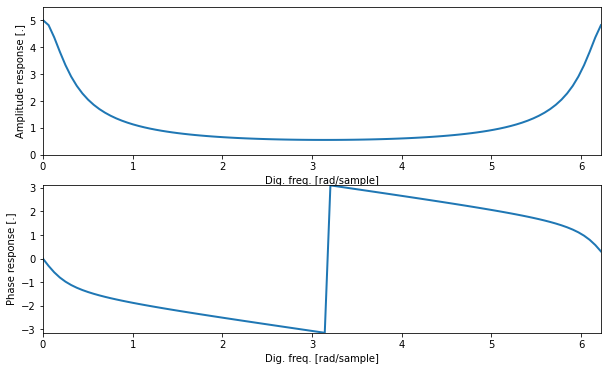

In [15]:
# plot the results
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(freqGrid, ampResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((0,1.1*np.max(ampResp)))
plt.xlabel('Dig. freq. [rad/sample]'), plt.ylabel('Amplitude response [.]');
plt.subplot(2,1,2)
plt.plot(freqGrid, phaseResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((-np.pi,np.pi))
plt.xlabel('Dig. freq. [rad/sample]'), plt.ylabel('Phase response [.]');

### Resonance filter
Assume that we can write the frequency response of a feedback filter as
$$
    H(\omega) = \frac{b_0}{(1-p_1\mathrm{e}^{-j\omega})(1-p_1^*\mathrm{e}^{-j\omega})}
$$
where $p_1$ is a so-called **pole** which we are going to talk more about in lecture 6.

A pole is a complex number so we can write it in a polar form as
\begin{align}
    p_1 &= R\mathrm{e}^{j\theta}\\
    p_1^* &= R\mathrm{e}^{-j\theta}
\end{align}
where $R$ is the magnitude and $\theta$ an angle.

If we insert these expression for $p_1$ and $p_1^*$ in the frequency response, we obtain
\begin{align}
    H(\omega) &= \frac{b_0}{(1-R\mathrm{e}^{j\theta}\mathrm{e}^{-j\omega})(1-R\mathrm{e}^{-j\theta}\mathrm{e}^{-j\omega})}\\
    &= \frac{b_0}{1-2R\cos(\theta)\mathrm{e}^{-j\omega}+R^2\mathrm{e}^{-j2\omega}}\ .
\end{align}

We now see that the resonance filter has filter coefficients
\begin{align}
    a_1 &= 2R\cos(\theta)\\
    a_2 &= -R^2\ .
\end{align}

<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture4_What_are_Filters/figures/ap4ResonatorSketch.png?raw=1" alt="Resonator Filter Illustration" width="80%"/>
</center>

We now wish to choose $b_0$, $R$, and $\theta$ so that we get
- the desired center frequency $\omega_\text{c}$
- the desired bandwidth $B_\text{w}$
- the desired gain at the center frequency


Unfortunately, it is a bit complicated to show, but it can be shown that
\begin{align}
    \omega_\text{c} &= \arccos\left(\frac{1+R^2}{2R}\cos(\theta)\right)\ ,\quad\text{if }\cos(\theta)\leq\frac{2R}{1+R^2}\\
    B_\text{w} &\approx 2-2R\\
    b_0 &= (1-R^2)\sin(\theta)\ .
\end{align}

From these equations, we can compute the values of $b_0$, $R$, and $\theta$ as
\begin{align}
    R &\approx \frac{2-B_\text{w}}{2}\\
    \theta &= \arccos\left(\frac{2R}{1+R^2}\cos(\omega_\text{c})\right)\\
    b_0 &= (1-R^2)\sin(\theta)\ .
\end{align}


In [16]:
def resonanceFreqResp(centerFreq, bandwidth, freqGrid):
    nFreqs = np.size(freqGrid)
    poleRadius = (2-bandwidth)/2
    poleAngle = np.arccos(2*poleRadius*np.cos(centerFreq)/(1+poleRadius**2))
    gain = (1-poleRadius**2)*np.sin(poleAngle)
    iirCoefficients = np.array([2*poleRadius*np.cos(poleAngle), -poleRadius**2])
    freqResp = gain/(1-2*poleRadius*np.cos(poleAngle)*np.exp(-1j*freqGrid)+poleRadius**2*np.exp(-1j*2*freqGrid))
    return freqResp

In [17]:
# compute the frequency response
nFreqs = 1000
samplingFreq = 1000;
digFreqGrid = 2*np.pi*np.arange(nFreqs)/nFreqs
freqGrid = digFreqGrid*samplingFreq/(2*np.pi)
centerFreq = 2*np.pi*100/samplingFreq
bandwidth = 2*np.pi*50/samplingFreq
freqResp = resonanceFreqResp(centerFreq, bandwidth, digFreqGrid)
ampResp = np.abs(freqResp)
phaseResp = np.angle(freqResp)

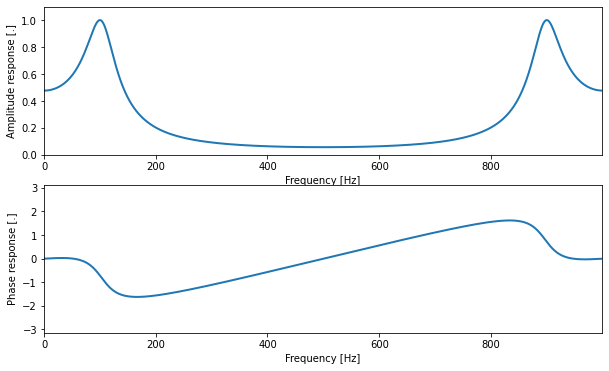

In [18]:
# plot the results
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(freqGrid, ampResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((0,1.1*np.max(ampResp)))
plt.xlabel('Frequency [Hz]'), plt.ylabel('Amplitude response [.]');
plt.subplot(2,1,2)
plt.plot(freqGrid, phaseResp, linewidth=2)
plt.xlim((freqGrid[0],freqGrid[nFreqs-1])), plt.ylim((-np.pi,np.pi))
plt.xlabel('Frequency [Hz]'), plt.ylabel('Phase response [.]');

### Summary
1. A feedback filter (with no feedforward part, i.e., $q=0$) has the difference equation
\begin{align}
    y_n &= b_0x_n + a_1y_{n-1} + \ldots + a_py_{n-p} = b_0x_n + \sum_{m=0}^{p} a_m y_{n-m}\ .
\end{align}
2. The feedback filter is often referred to as an **infinite impulse response** (IIR) filter since its output never becomes zero for a finite sampling index.
3. The frequency response of an IIR filter (with $q=0$) is
$$
    H(\omega) = \frac{b_0}{1-\sum_{m=1}^p a_m\mathrm{e}^{-j\omega m}}\ .
$$
4. A resonance filter is a special kind of filter with the difference equation
\begin{align}
    y_n &= b_0x_n + 2R\cos(\theta)y_{n-1} - R^2y_{n-2}\ .
\end{align}

### Active break
Do exercise 2-4 in the *Introduction to Audio Processing* book (p. 60). You can use Python instead of Pure Data.